In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
chargers=pd.read_excel(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\CHARGER STATIONS\Electromaps.xlsx")
chargers.sample(5)

,Número de punto de carga,Dirección,CP,Tipo,Nombre en la app,Alcaldía,Tipo de conector,Cantidad,Potencia,Unidad,...,TYPE 1 (SAE J1772),NEMA 5-15 (US Plug),CHAdeMO,TYPE 2,NEMA 14-50,Tesla Supercharger,Tesla Dest.Charger,CCS1,CCS2,"Type J (CH, LI, RW Plug)"
58,59.0,227 Plaza Carso 11529,11529.0,Centro Comercial,plaza carso,Miguel Hidalgo,TYPE 1 (SAE J1772),1,5,kw,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,45.0,"Av. P.º de la Reforma 80, Juárez,06600",6600.0,Hotel,Fiesta Americana Reforma,Cuauhtémoc,Tesla Dest.Charger,2,10,kw,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
36,37.0,1745 1745 05110,NaN,Estacionamiento,JLR México,Benito Juárez,CCS1,1,50,kw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
47,48.0,33 Orizaba 06700,6700.0,Superficie,cfe,Cuauhtémoc,TYPE 1 (SAE J1772),1,7.4,kw,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,57.0,222 Palacio de Hierro 11570,11570.0,Estacionamiento,Palacio de hierro Polanco Tesla charger,Miguel Hidalgo,"Tesla Dest.Charger, TYPE 2",1,#-,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN


## Limpieza de datos

In [208]:
chargers.drop(columns="Número de punto de carga",inplace=True)

In [209]:
chargers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dirección                 79 non-null     object 
 1   CP                        78 non-null     float64
 2   Tipo                      79 non-null     object 
 3   Nombre en la app          80 non-null     object 
 4   Alcaldía                  80 non-null     object 
 5   Tipo de conector          80 non-null     object 
 6   Cantidad                  80 non-null     object 
 7   Potencia                  80 non-null     object 
 8   Unidad                    72 non-null     object 
 9   Marca                     35 non-null     object 
 10  Total de cargadores       81 non-null     int64  
 11  TYPE 1 (SAE J1772)        58 non-null     float64
 12  NEMA 5-15 (US Plug)       7 non-null      float64
 13  CHAdeMO                   8 non-null      float64
 14  TYPE 2      

In [210]:
chargers.rename(columns={
    
    "Dirección" : "Direccion",
    "Alcaldía" : "Alcaldia",
    "Nombre en la app": "Nombre_App",
    "Tipo de conector" : "Tipo_conector",
    "Total de cargadores" : "Total_cargadores"
    
},inplace=True)

In [211]:
chargers[["Direccion","Tipo","Marca"]]=chargers[["Direccion","Tipo","Marca"]].fillna("Desconocido")
chargers.Unidad.fillna("kW",inplace=True)
chargers.Unidad.replace("kw","kW",inplace=True)
chargers.Potencia.replace("#-","0",inplace=True)
chargers.fillna(0,inplace=True)


In [212]:
chargers.Alcaldia=chargers.Alcaldia.str.strip()
#chargers.drop(axis=1, index=80,inplace=True)

In [213]:
chargers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Direccion                 81 non-null     object 
 1   CP                        81 non-null     float64
 2   Tipo                      81 non-null     object 
 3   Nombre_App                81 non-null     object 
 4   Alcaldia                  80 non-null     object 
 5   Tipo_conector             81 non-null     object 
 6   Cantidad                  81 non-null     object 
 7   Potencia                  81 non-null     object 
 8   Unidad                    81 non-null     object 
 9   Marca                     81 non-null     object 
 10  Total_cargadores          81 non-null     int64  
 11  TYPE 1 (SAE J1772)        81 non-null     float64
 12  NEMA 5-15 (US Plug)       81 non-null     float64
 13  CHAdeMO                   81 non-null     float64
 14  TYPE 2      

Hasta este punto, el dataframe fue limpiado y se limpiaron los valores nulos

In [214]:
chargers.sample(5)

,Direccion,CP,Tipo,Nombre_App,Alcaldia,Tipo_conector,Cantidad,Potencia,Unidad,Marca,...,TYPE 1 (SAE J1772),NEMA 5-15 (US Plug),CHAdeMO,TYPE 2,NEMA 14-50,Tesla Supercharger,Tesla Dest.Charger,CCS1,CCS2,"Type J (CH, LI, RW Plug)"
11,"Av. Centro Comercial 190, Jardines del Pedrega...",4530.0,Centro Comercial,Walmart Perisur,Coyoacán,TYPE 1 (SAE J1772),1,7.4,kW,Walmart,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,34 Avenida Álvaro Obregón 06700,6700.0,Hotel,Álvaro Obregón,Cuauhtémoc,Tesla Supercharger,2,0,kW,Desconocido,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
39,75 B Antonio Dovali Jaime 01210,1210.0,Concensionario,BMW Santa Fe,Álvaro Obregón,"TYPE 1 (SAE J1772), CCS2",1,"7,50",kW,BMW,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,85 Vito Alessio Robles 01030,1030.0,Estacionamiento,Centro Escolar Cedros,Álvaro Obregón,TYPE 1 (SAE J1772),2,3.7,kW,Desconocido,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,524 Calzada del Hueso 04920,4920.0,Concensionario,BMW calza el hueso,Coyoacán,TYPE 1 (SAE J1772),1,3,kW,BMW,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creando tablas importantes

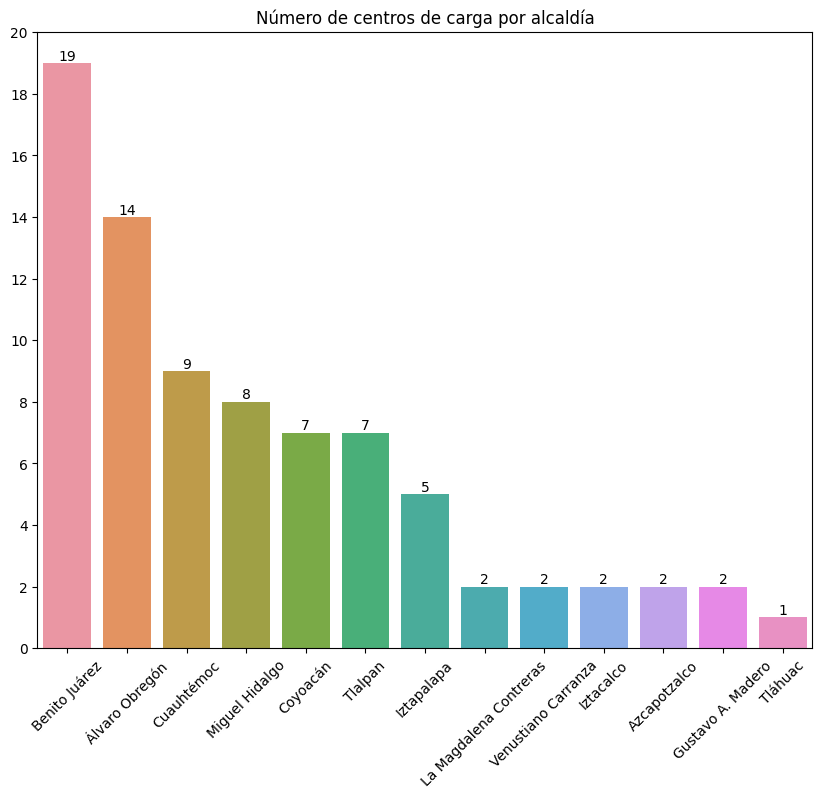

In [215]:
plt.figure(figsize=(10,8))
fig=sns.barplot(data=chargers,
            x=chargers.Alcaldia.value_counts().index,
            y=chargers.Alcaldia.value_counts().values)
fig.set_title("Número de centros de carga por alcaldía")
fig.set_ylabel("")
fig.set_xlabel("")
plt.yticks(range(0,chargers.Alcaldia.value_counts().values.max()+2,2))
plt.xticks(rotation=45)

for i in fig.containers:
    fig.bar_label(i,)
plt.show()

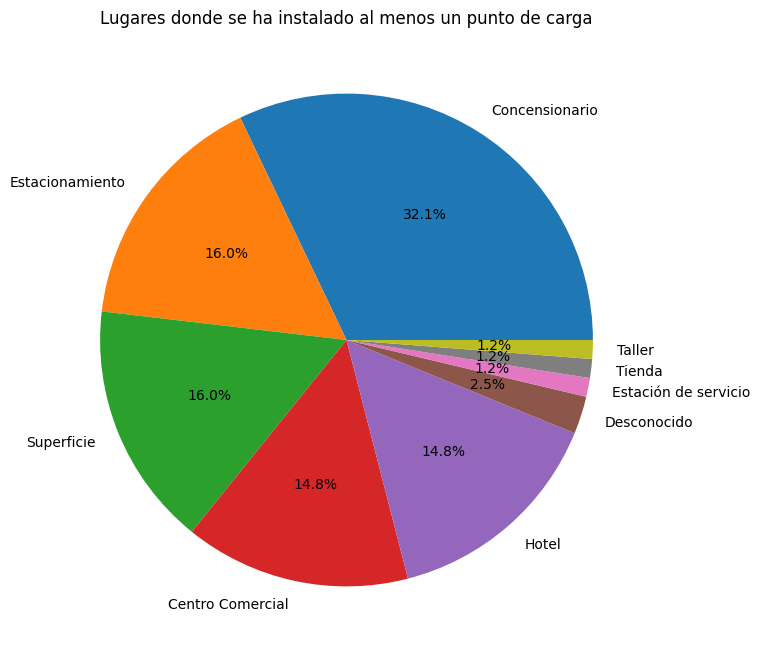

In [242]:
plt.figure(figsize=(10,8))
fig=plt.pie(x=chargers.Tipo.value_counts().values.tolist(), 
            labels=chargers.Tipo.value_counts().index,
            autopct="%1.1f%%",
            )
plt.title("Lugares donde se ha instalado al menos un punto de carga")
plt.show()


In [244]:
cargadores_tot=chargers.groupby("Alcaldia").sum(numeric_only=True)[["Total_cargadores",
                                                     "TYPE 1 (SAE J1772)",
                                                     "NEMA 5-15 (US Plug)",
                                                     "Tesla Supercharger",
                                                     "Tesla Dest.Charger",
                                                     "CCS1",
                                                     "CCS2",
                                                     "Type J (CH, LI, RW Plug)"
                                                     ]]
cargadores_tot

,Total_cargadores,TYPE 1 (SAE J1772),NEMA 5-15 (US Plug),Tesla Supercharger,Tesla Dest.Charger,CCS1,CCS2,"Type J (CH, LI, RW Plug)"
Alcaldia,,,,,,,,
Azcapotzalco,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Benito Juárez,51,22.0,9.0,0.0,7.0,3.0,2.0,0.0
Coyoacán,10,8.0,0.0,0.0,2.0,0.0,0.0,0.0
Cuauhtémoc,14,3.0,0.0,2.0,8.0,0.0,0.0,0.0
Gustavo A. Madero,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Iztacalco,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Iztapalapa,8,5.0,0.0,0.0,2.0,0.0,0.0,0.0
La Magdalena Contreras,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Miguel Hidalgo,20,4.0,0.0,0.0,11.0,0.0,1.0,0.0


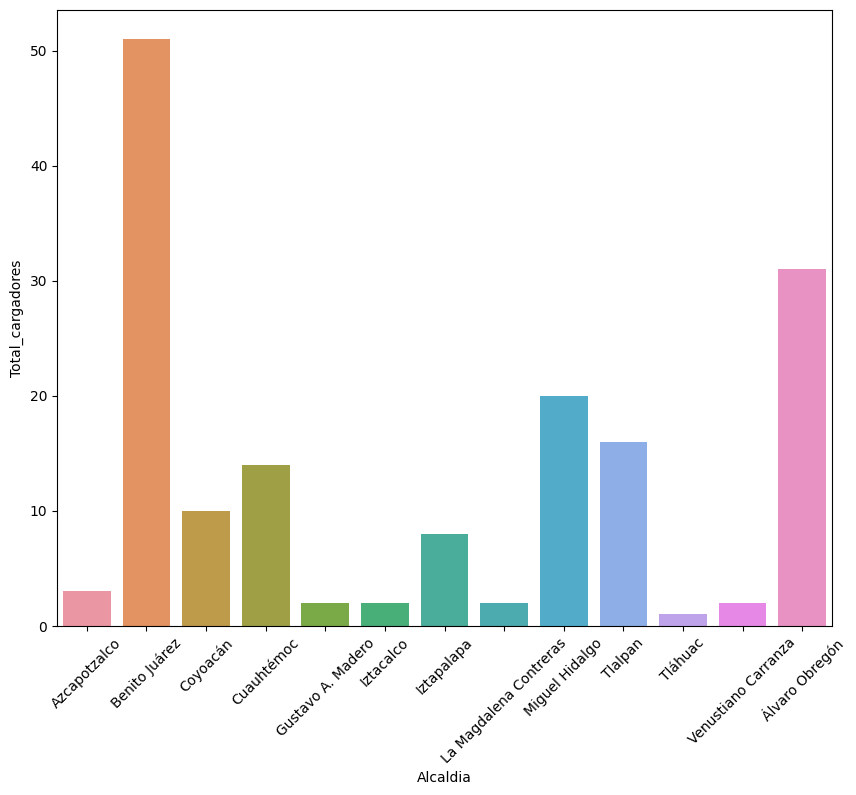

In [252]:
plt.figure(figsize=(10,8))
fig=sns.barplot(data=cargadores_tot, x=cargadores_tot.index, y="Total_cargadores")
plt.xticks(rotation=45)
plt.show()

## Cambiando datos de electrolineras a centros de carga

El dataframe está dividido por centro de carga, no por cargadores, por lo que la tarea principal es generar otro dataframe con los datos de todos los cargadores.

In [217]:
"""# Ponemos todos los parámetros que formarán parte del nuevo dataset
alcaldias=[]
CP=[]
tipo=[]
direccion=[]
nombre_app=[]
potencia=[]

for electrolinera in chargers.Cantidad: #voy fila por fila
    indice=chargers.Cantidad.index[electrolinera] #obtengo el índice donde está esa fila,
    #para después poner toda la información de ahí en las listas
    if ((len(str(electrolinera).split())!='1') & (int(electrolinera))!= 1):
        
    else: 
        alcaldias.append(chargers.Alcaldias[indice])
        CP.append(chargers.CP[indice])
        tipo.append(chargers.Tipo[indice])
        direccion.append(chargers.direccion[indice])
        nombre_app.append(chargers.Nombre_App[indice])
        potencia.append(chargers.potencia[indice])
        """

"# Ponemos todos los parámetros que formarán parte del nuevo dataset\nalcaldias=[]\nCP=[]\ntipo=[]\ndireccion=[]\nnombre_app=[]\npotencia=[]\n\nfor electrolinera in chargers.Cantidad: #voy fila por fila\n    indice=chargers.Cantidad.index[electrolinera] #obtengo el índice donde está esa fila,\n    #para después poner toda la información de ahí en las listas\n    if ((len(str(electrolinera).split())!='1') & (int(electrolinera))!= 1):\n        \n    else: \n        alcaldias.append(chargers.Alcaldias[indice])\n        CP.append(chargers.CP[indice])\n        tipo.append(chargers.Tipo[indice])\n        direccion.append(chargers.direccion[indice])\n        nombre_app.append(chargers.Nombre_App[indice])\n        potencia.append(chargers.potencia[indice])\n        "

In [218]:
chargers.Alcaldia.value_counts()

Benito Juárez             19
Álvaro Obregón            14
Cuauhtémoc                 9
Miguel Hidalgo             8
Coyoacán                   7
Tlalpan                    7
Iztapalapa                 5
La Magdalena Contreras     2
Venustiano Carranza        2
Iztacalco                  2
Azcapotzalco               2
Gustavo A. Madero          2
Tláhuac                    1
Name: Alcaldia, dtype: int64

In [219]:
d=dict(chargers.Alcaldía.value_counts())
chargers["Cargadores_Alcaldia"]=chargers.Alcaldía
chargers.Cargadores_Alcaldia=chargers.Cargadores_Alcaldia.map(d)
chargers.Cargadores_Alcaldia

AttributeError: 'DataFrame' object has no attribute 'Alcaldía'

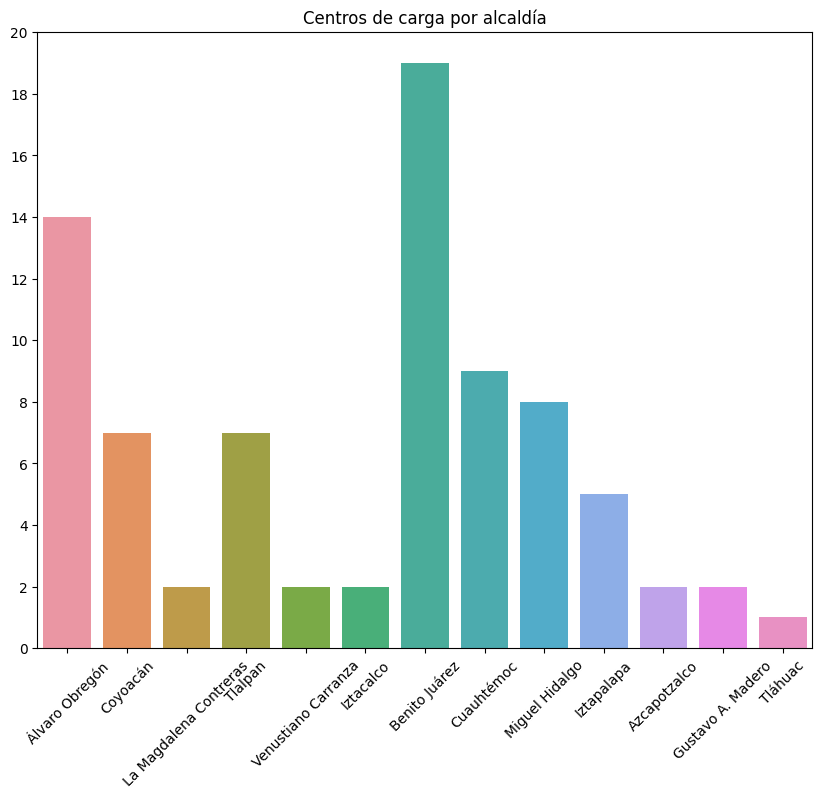

In [ ]:
plt.figure(figsize=(10,8))
fig=sns.barplot(data=chargers, x="Alcaldía", y="Cargadores_Alcaldia")
plt.xticks(rotation=45)
fig.set_title("Centros de carga por alcaldía")
fig.set_xlabel("")
fig.set_ylabel("")
plt.yticks(range(0,int(chargers.Cargadores_Alcaldia.max()+2),2))
plt.show()

In [ ]:
chargers.Cantidad.value_counts()

1              46
2              16
1,1             4
2,1             4
3,1             3
4               2
1,1,1           1
2,1,1,1,1,1     1
8               1
4,2             1
2,1,1,1,1       1
Name: Cantidad, dtype: int64

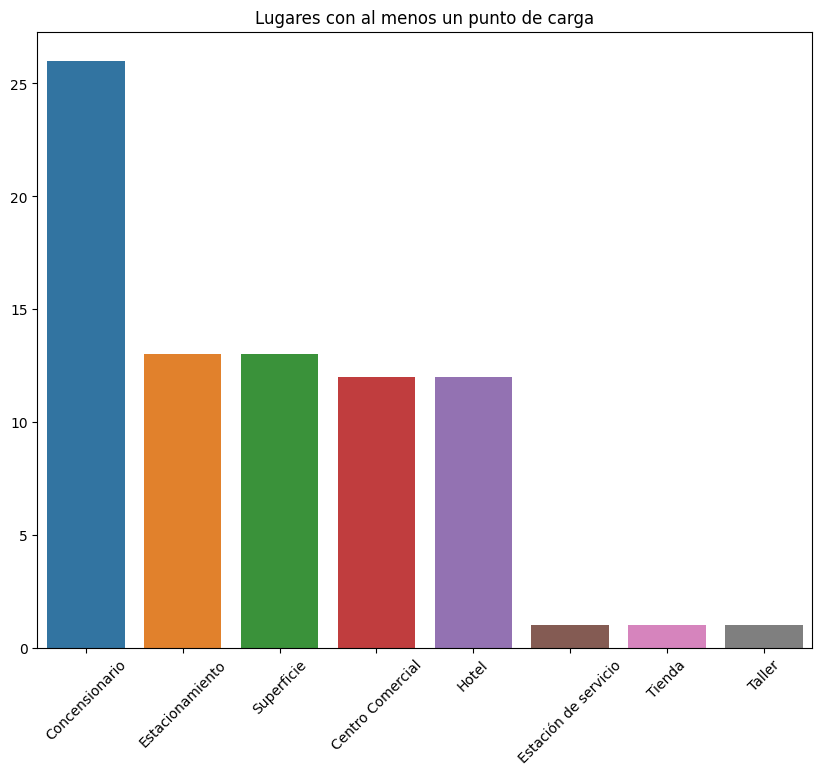

In [ ]:
lugares=chargers.Tipo.value_counts()
plt.figure(figsize=(10,8))
fig=sns.barplot(x=lugares.index, y=lugares.values)
fig.set_title("Lugares con al menos un punto de carga")
plt.xticks(rotation=45)
plt.show()

In [ ]:
tipos=chargers.groupby("Alcaldía").sum(numeric_only=True).drop(columns=["CP","Cargadores_Alcaldia"])
tipos

,Total de cargadores,TYPE 1 (SAE J1772),NEMA 5-15 (US Plug),CHAdeMO,TYPE 2,NEMA 14-50,Tesla Supercharger,Tesla Dest.Charger,CCS1,CCS2,"Type J (CH, LI, RW Plug)"
Alcaldía,,,,,,,,,,,
Azcapotzalco,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Benito Juárez,51,22.0,9.0,4.0,1.0,3.0,0.0,7.0,3.0,2.0,0.0
Coyoacán,10,8.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Cuauhtémoc,14,3.0,0.0,0.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0
Gustavo A. Madero,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iztacalco,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Iztapalapa,8,5.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
La Magdalena Contreras,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Miguel Hidalgo,20,4.0,0.0,1.0,2.0,1.0,0.0,11.0,0.0,1.0,0.0


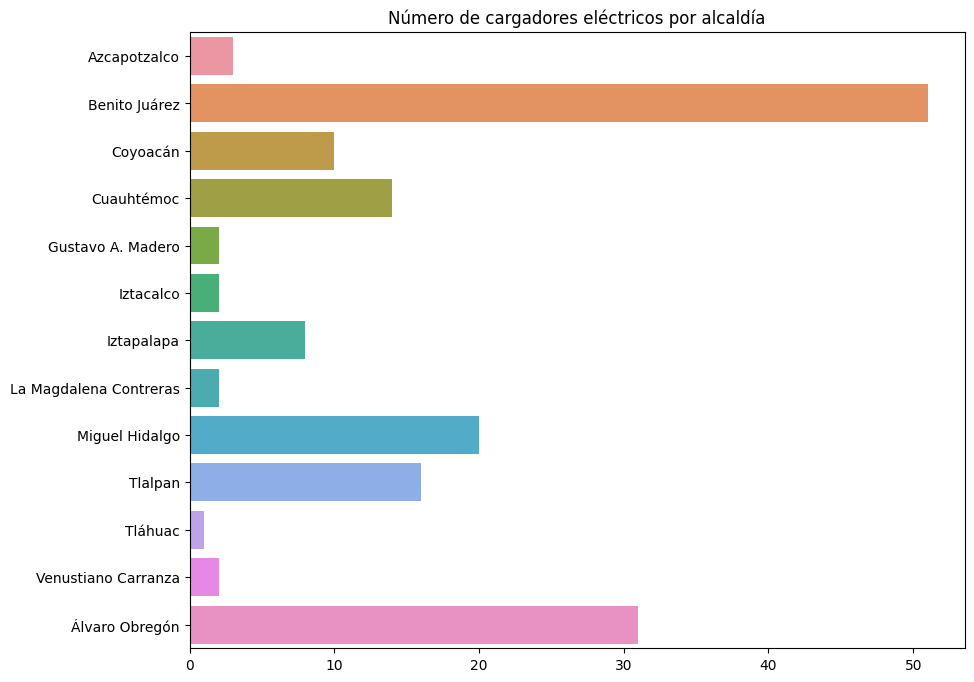

In [ ]:
plt.figure(figsize=(10,8))
fig=sns.barplot(data=tipos,y=tipos.index, x="Total de cargadores")
fig.set_title("Número de cargadores eléctricos por alcaldía")
fig.set_ylabel("")
fig.set_xlabel("")
plt.show()


El dataframe está dividido por centro de carga, no por cargadores, por lo que la tarea principal es generar otro dataframe con los datos de todos los cargadores.

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
chargers.dtypes

Dirección                    object
CP                          float64
Tipo                         object
Nombre en la app             object
Alcaldía                     object
Tipo de conector             object
Cantidad                     object
Potencia                     object
Unidad                       object
Marca                        object
Total de cargadores           int64
TYPE 1 (SAE J1772)          float64
NEMA 5-15 (US Plug)         float64
CHAdeMO                     float64
TYPE 2                      float64
NEMA 14-50                  float64
Tesla Supercharger          float64
Tesla Dest.Charger          float64
CCS1                        float64
CCS2                        float64
Type J (CH, LI, RW Plug)    float64
Cargadores_Alcaldia         float64
dtype: object